In [ ]:
pip install ucimlrepo

#**Import Important lib**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


#**import Dataset**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# Convert features and targets into DataFrames
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

# Combine features and targets into one DataFrame
df = pd.concat([X_df, y_df], axis=1)

# Display metadata
print(car_evaluation.metadata)

# Display variable information
print(car_evaluation.variables)

{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

#**Exploratory Data Analysis (EDA)**

In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

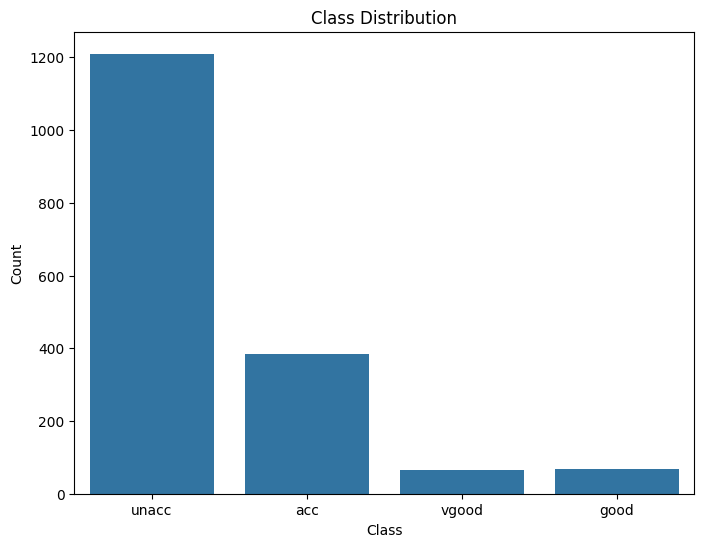

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


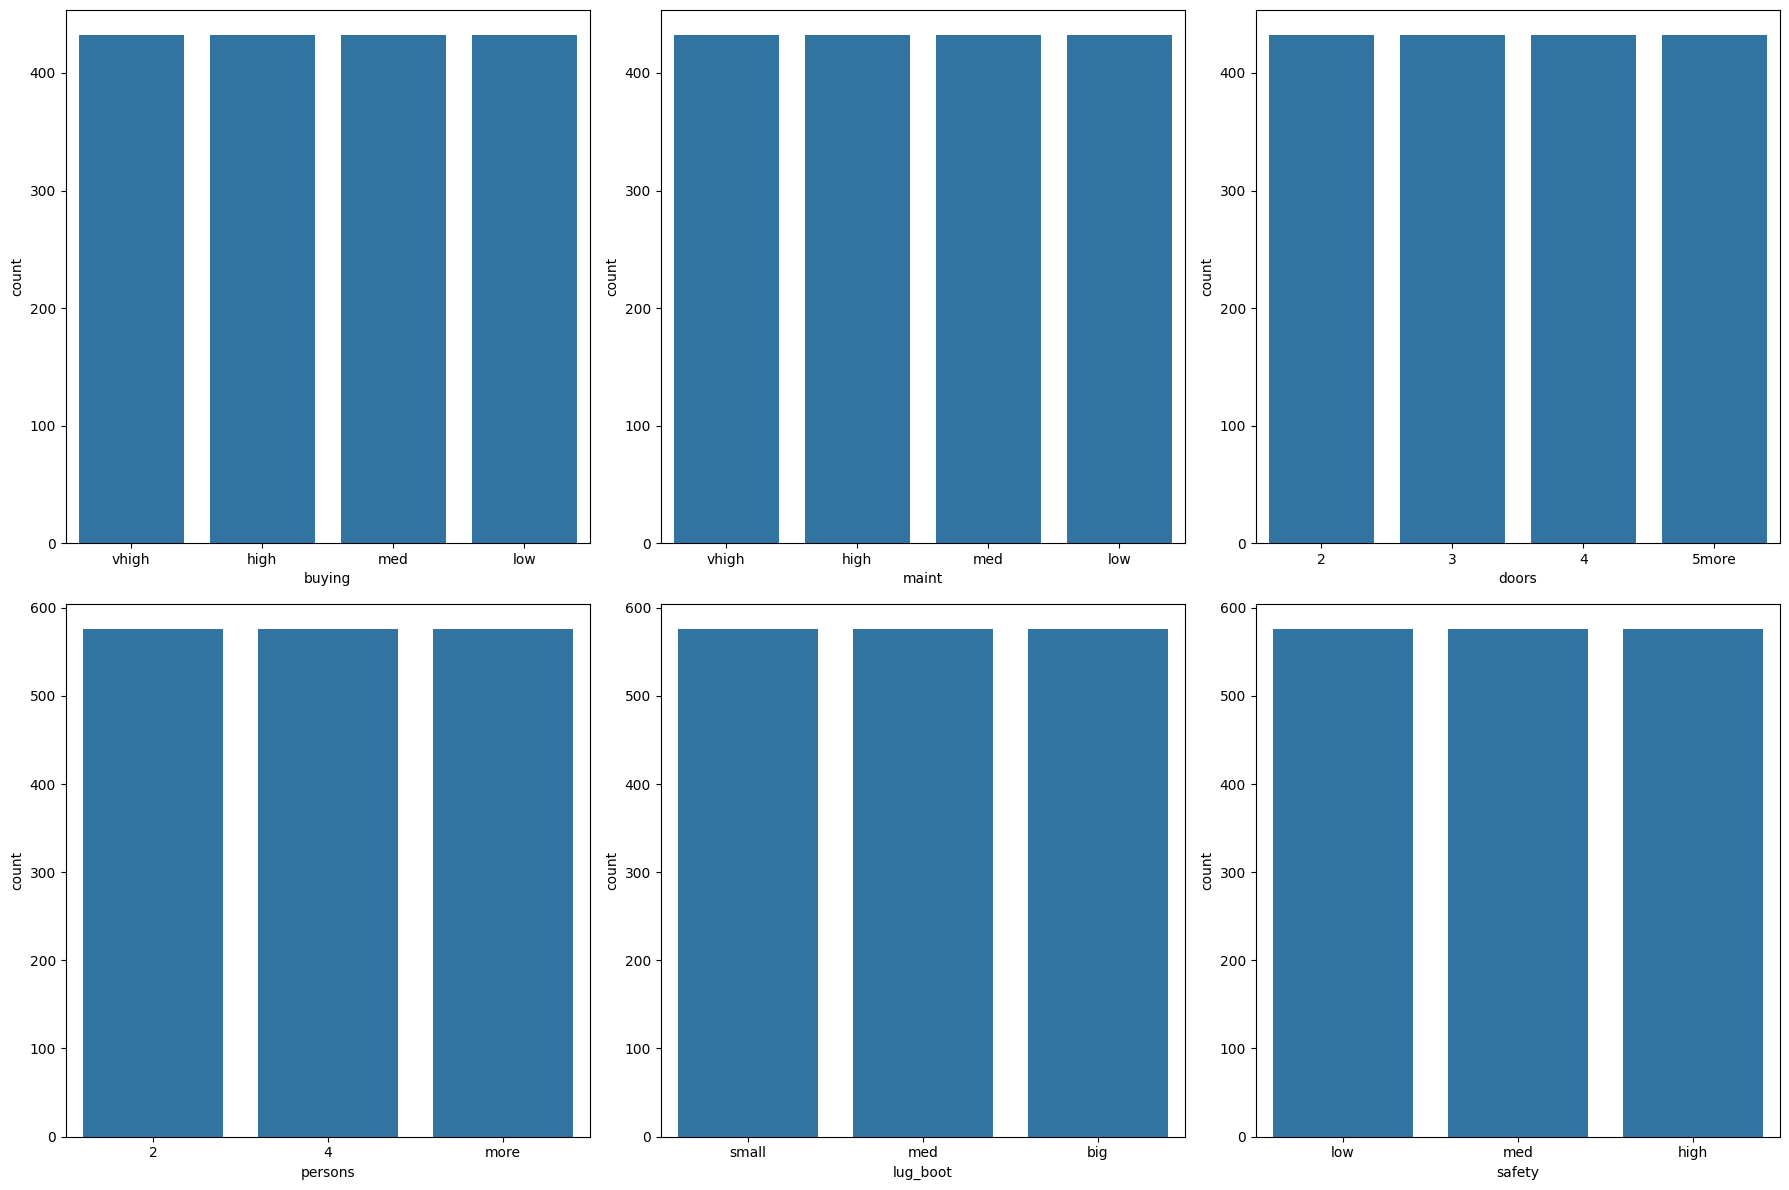

In [ ]:
# Plot feature distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.countplot(x='buying', data=df, ax=axes[0, 0])
sns.countplot(x='maint', data=df, ax=axes[0, 1])
sns.countplot(x='doors', data=df, ax=axes[0, 2])
sns.countplot(x='persons', data=df, ax=axes[1, 0])
sns.countplot(x='lug_boot', data=df, ax=axes[1, 1])
sns.countplot(x='safety', data=df, ax=axes[1, 2])


plt.tight_layout()
plt.show()

In [ ]:
# Load dataset
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split dataset
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1382, 6)

In [ ]:
y_train.shape

(1382,)

#**Model Building**

**Decision Tree**

In [ ]:
dc = DecisionTreeClassifier()

In [ ]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dc.predict(X_test)
y_pred

array([2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0,
       1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 3, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
decision_tree_acc = (accuracy_score(y_test,y_pred))
print(decision_tree_acc)

[[ 76   6   1   0]
 [  1  10   0   0]
 [  0   0 235   0]
 [  1   2   0  14]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        83
           1       0.56      0.91      0.69        11
           2       1.00      1.00      1.00       235
           3       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.88      0.91      0.88       346
weighted avg       0.98      0.97      0.97       346

0.9682080924855492


**Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
rfc_grid = RandomizedSearchCV(rfc, rfc_params, cv=5, n_jobs=-1)


In [ ]:
rfc_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [ ]:
print(f"Best Random Forest Params: {rfc_grid.best_params_}")
rfc_best = rfc_grid.best_estimator_
rfc_pred = rfc_best.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rfc_pred)}")

Best Random Forest Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
Random Forest Accuracy: 0.9653179190751445


In [ ]:
rfc1 = RandomForestClassifier(n_estimators=300, min_samples_split=2,min_samples_leaf=1,max_depth=20, bootstrap=True)

In [ ]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=300)

In [ ]:
y_pred = rfc1.predict(X_test)
y_pred

array([2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 3, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
Random_foreest_acc =  (accuracy_score(y_test,y_pred))
print(Random_foreest_acc)

[[ 74   8   1   0]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   0   0  16]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94        83
           1       0.58      1.00      0.73        11
           2       1.00      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.89      0.96      0.91       346
weighted avg       0.98      0.97      0.97       346

0.9710982658959537


**Ada Boost Classifier**
> Add blockquote



In [ ]:
abc = AdaBoostClassifier()
abc_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0, 1.5, 2.0]
}

In [ ]:
abc_grid = RandomizedSearchCV(abc, abc_params, cv=5, n_jobs=-1)

In [ ]:
abc_grid.fit(X_train, y_train)
print(f"Best AdaBoost Params: {abc_grid.best_params_}")
abc_best = abc_grid.best_estimator_
abc_pred = abc_best.predict(X_test)
print(f"AdaBoost Accuracy: {accuracy_score(y_test, abc_pred)}")

Best AdaBoost Params: {'n_estimators': 200, 'learning_rate': 1.5}
AdaBoost Accuracy: 0.7832369942196532


In [ ]:
adc = AdaBoostClassifier(learning_rate=1.0,n_estimators=200)

In [ ]:
adc.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=200)

In [ ]:
y_pred = adc.predict(X_test)
y_pred

array([2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 3,
       2, 0, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2,
       3, 3, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2,
       2, 1, 3, 0, 2, 2, 2, 0, 2, 3, 0, 0, 2, 2, 2,

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
AdaBoost_acc = (accuracy_score(y_test,y_pred))
print(AdaBoost_acc)

[[ 24  12  46   1]
 [  2   9   0   0]
 [ 12   4 219   0]
 [  1   0   0  16]]
              precision    recall  f1-score   support

           0       0.62      0.29      0.39        83
           1       0.36      0.82      0.50        11
           2       0.83      0.93      0.88       235
           3       0.94      0.94      0.94        17

    accuracy                           0.77       346
   macro avg       0.69      0.75      0.68       346
weighted avg       0.77      0.77      0.75       346

0.7745664739884393


**Gradient Boosting**

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
}

In [ ]:
gbc_grid = RandomizedSearchCV(gbc, gbc_params, cv=5, n_jobs=-1)

In [ ]:
gbc_grid .fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [ ]:
print(f"Best Gradient Boosting Params: {gbc_grid.best_params_}")
gbc_best = gbc_grid.best_estimator_
gbc_pred = gbc_best.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gbc_pred)}")

Best Gradient Boosting Params: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 4, 'learning_rate': 0.2}
Gradient Boosting Accuracy: 1.0


In [ ]:
gbc = GradientBoostingClassifier(n_estimators = 100, min_samples_split = 10, max_depth = 4 , learning_rate = 0.2)

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=4, min_samples_split=10)

In [ ]:
y_pred = gbc.predict(X_test)
y_pred

array([2, 1, 2, 0, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0,
       0, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 3, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
GradientBoosting_acc =  (accuracy_score(y_test,y_pred))
print(GradientBoosting_acc)

[[ 79   4   0   0]
 [  0  11   0   0]
 [  0   0 235   0]
 [  0   0   0  17]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        83
           1       0.73      1.00      0.85        11
           2       1.00      1.00      1.00       235
           3       1.00      1.00      1.00        17

    accuracy                           0.99       346
   macro avg       0.93      0.99      0.96       346
weighted avg       0.99      0.99      0.99       346

0.9884393063583815


**XGBoost**

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb


In [ ]:
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


In [ ]:
xgb_grid = RandomizedSearchCV(xgb_model, xgb_params, cv=5, n_jobs=-1)


In [ ]:
xgb_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]})

In [ ]:
print(f"Best XGBoost Params: {xgb_grid.best_params_}")
xgb_best = xgb_grid.best_estimator_
xgb_pred = xgb_best.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_pred)}")

Best XGBoost Params: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
XGBoost Accuracy: 0.9710982658959537


In [ ]:
xgb = xgb.XGBClassifier(subsample=0.9,n_estimators=200,min_child_weight=1,max_depth=5,learning_rate=0.2, colsample_bytree=0.8)

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
xgb_acc =  (accuracy_score(y_test,y_pred))
print(xgb_acc)

[[ 77   6   0   0]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   2   0  14]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        83
           1       0.58      1.00      0.73        11
           2       1.00      1.00      1.00       235
           3       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.89      0.94      0.90       346
weighted avg       0.98      0.97      0.98       346

0.9739884393063584


# **Model Evaluation**

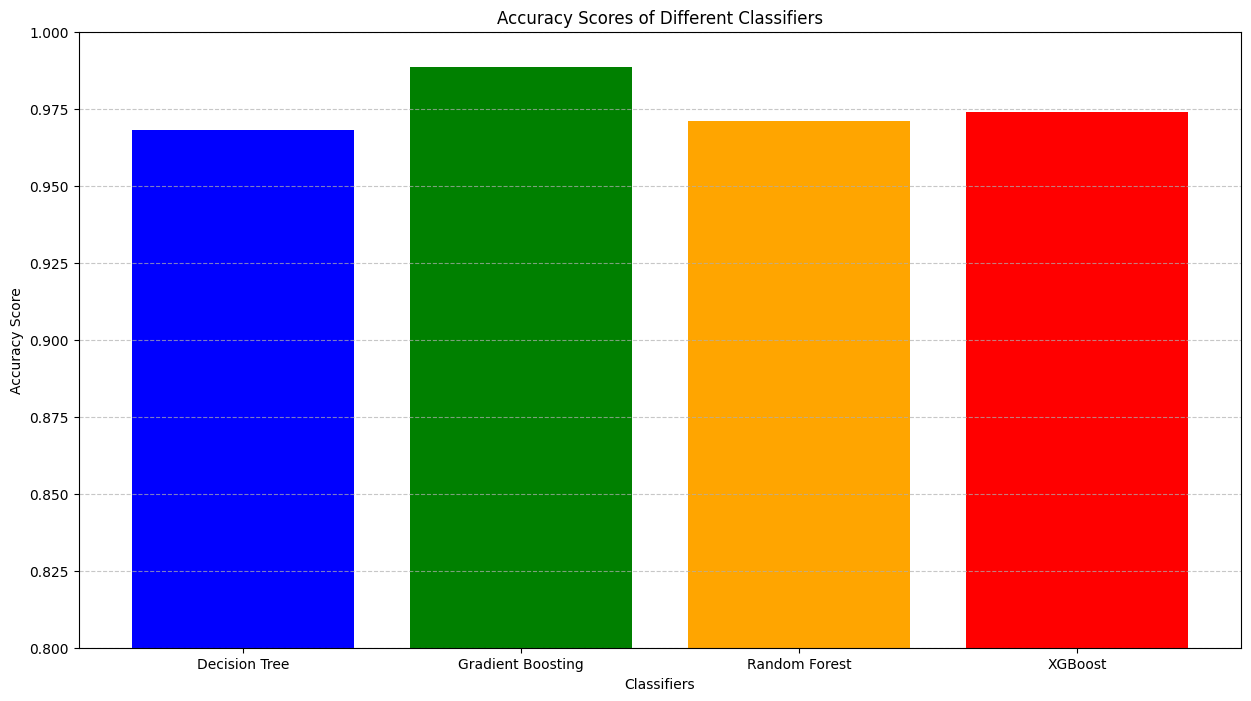

In [ ]:
# Names of classifiers
classifiers = ['Decision Tree', 'Gradient Boosting', 'Random Forest', 'XGBoost']
# Accuracy scores
scores = [decision_tree_acc,  GradientBoosting_acc, Random_foreest_acc, xgb_acc]

# Plotting the bar chart
plt.figure(figsize=(15,8))
plt.bar(classifiers, scores, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Accuracy Scores of Different Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.ylim(0.8, 1)  # Limit y-axis from 0.8 to 1 for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
import pickle

#save best model GradientBoosting

pickle.dump(gbc,open("gradient_boosting_model.pkl","wb"))



In [ ]:
# Assuming df is your DataFrame
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Save DataFrame and label encoders to a pickle file
data_dict = {'dataframe': df, 'label_encoders': label_encoders}

with open('encoded_data.pkl', 'wb') as f:
    pickle.dump(data_dict, f)